In [1]:
#import libraries
import momepy as mm
import geopandas as gpd
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
import libpysal
import numpy as np
import shapely
import mapclassify
import seaborn as sns

from scipy.spatial import Voronoi
from shapely.geometry.base import BaseGeometry
from shapely.ops import polygonize
from tqdm.auto import tqdm
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy

In [2]:
#load datasets 
Buildings = gpd.read_file('N_BF_V3.shp')
Streets = gpd.read_file('N_Streets_V2.shp')
Tessellation = gpd.read_file('tessellation_V1.shp')

In [7]:
#NOTE>>>> below is a proeporcessing step that shoud have been done earlier to create the blocks.

In [5]:
#extend streets to the limits created to create street blocks. 
limit = mm.buffered_limit(Buildings, 100)
extended = mm.extend_lines(Streets, tolerance=120, target=gpd.GeoSeries([limit.boundary]), barrier=Buildings)

In [6]:
#create blocks dataframe
blocks = mm.Blocks(Tessellation, edges=extended, buildings=Buildings, id_name='bID', unique_id='uID')
blocks_df = blocks.blocks  # get blocks df

<AxesSubplot: >

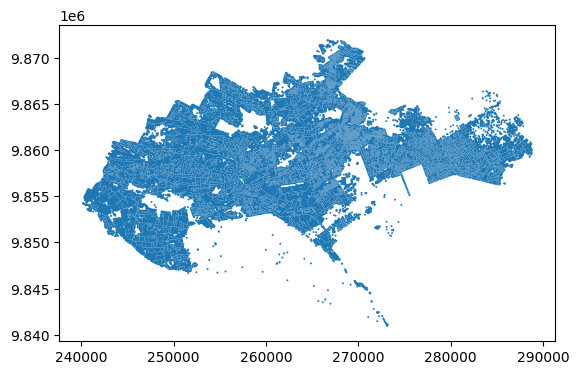

In [8]:
blocks_df.plot()

In [9]:
# save block dataframe
# Specify the absolute file path and format for the new version
output_file_path = '/data/private/momepy/blocks_df.shp'

# Save the cleaned GeoDataFrame to the new file
blocks_df.to_file(output_file_path)

In [10]:
#get block ID on buildings and tessellation dataframes
Buildings['bID'] = blocks.buildings_id.values  # get block ID
Tessellation['bID'] = blocks.tessellation_id.values  # get block ID

In [11]:
# Specify the absolute file path and format for the new version
output_file_path = '/data/private/momepy/N_BF_V3.shp'

# Save the cleaned GeoDataFrame to the new file
Buildings.to_file(output_file_path)

In [12]:
# Specify the absolute file path and format for the new version
output_file_path = '/data/private/momepy/tessellation_V1.shp'

# Save the cleaned GeoDataFrame to the new file
Tessellation.to_file(output_file_path)

In [13]:
#load datasets 
Buildings = gpd.read_file('N_BF_V3.shp')
Streets = gpd.read_file('N_Streets_V2.shp')
Tessellation = gpd.read_file('tessellation_V1.shp')

#### Morphometric Measurements
primary characters/ small/level 1/ elements it self

In [14]:
Buildings['bArea'] = mm.Area(Buildings).series
Buildings['bVol'] = mm.Volume(Buildings, 'height', 'bArea').series
Buildings['bPer'] = mm.Perimeter(Buildings).series
Buildings['bCoA'] = mm.CourtyardArea(Buildings, 'bArea').series

Buildings['bFoF'] = mm.FormFactor(Buildings, 'bVol', 'bArea', heights="height").series
Buildings['bVFR'] = mm.VolumeFacadeRatio(Buildings, 'height', 'bVol', 'bPer').series
Buildings['bCCo'] = mm.CircularCompactness(Buildings, 'bArea').series
Buildings['bCor'] = mm.Corners(Buildings, verbose=False).series
Buildings['bSqu'] = mm.Squareness(Buildings, verbose=False).series
Buildings['bERI'] = mm.EquivalentRectangularIndex(Buildings, 'bArea', 'bPer').series
Buildings['bElo'] = mm.Elongation(Buildings).series

/usr/local/lib/python3.8/dist-packages/momepy/shape.py:832: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cosine_angle)
/usr/local/lib/python3.8/dist-packages/momepy/shape.py:956: RuntimeWarning: invalid value encountered in arccos
  angle = np.degrees(np.arccos(cosine_angle))


In [16]:
Buildings.columns

Index(['height', 'area_in_me', 'confidence', 'uID', 'FID', 'bID', 'geometry',
       'bArea', 'bVol', 'bPer', 'bCoA', 'bFoF', 'bVFR', 'bCCo', 'bCor', 'bSqu',
       'bERI', 'bElo'],
      dtype='object')

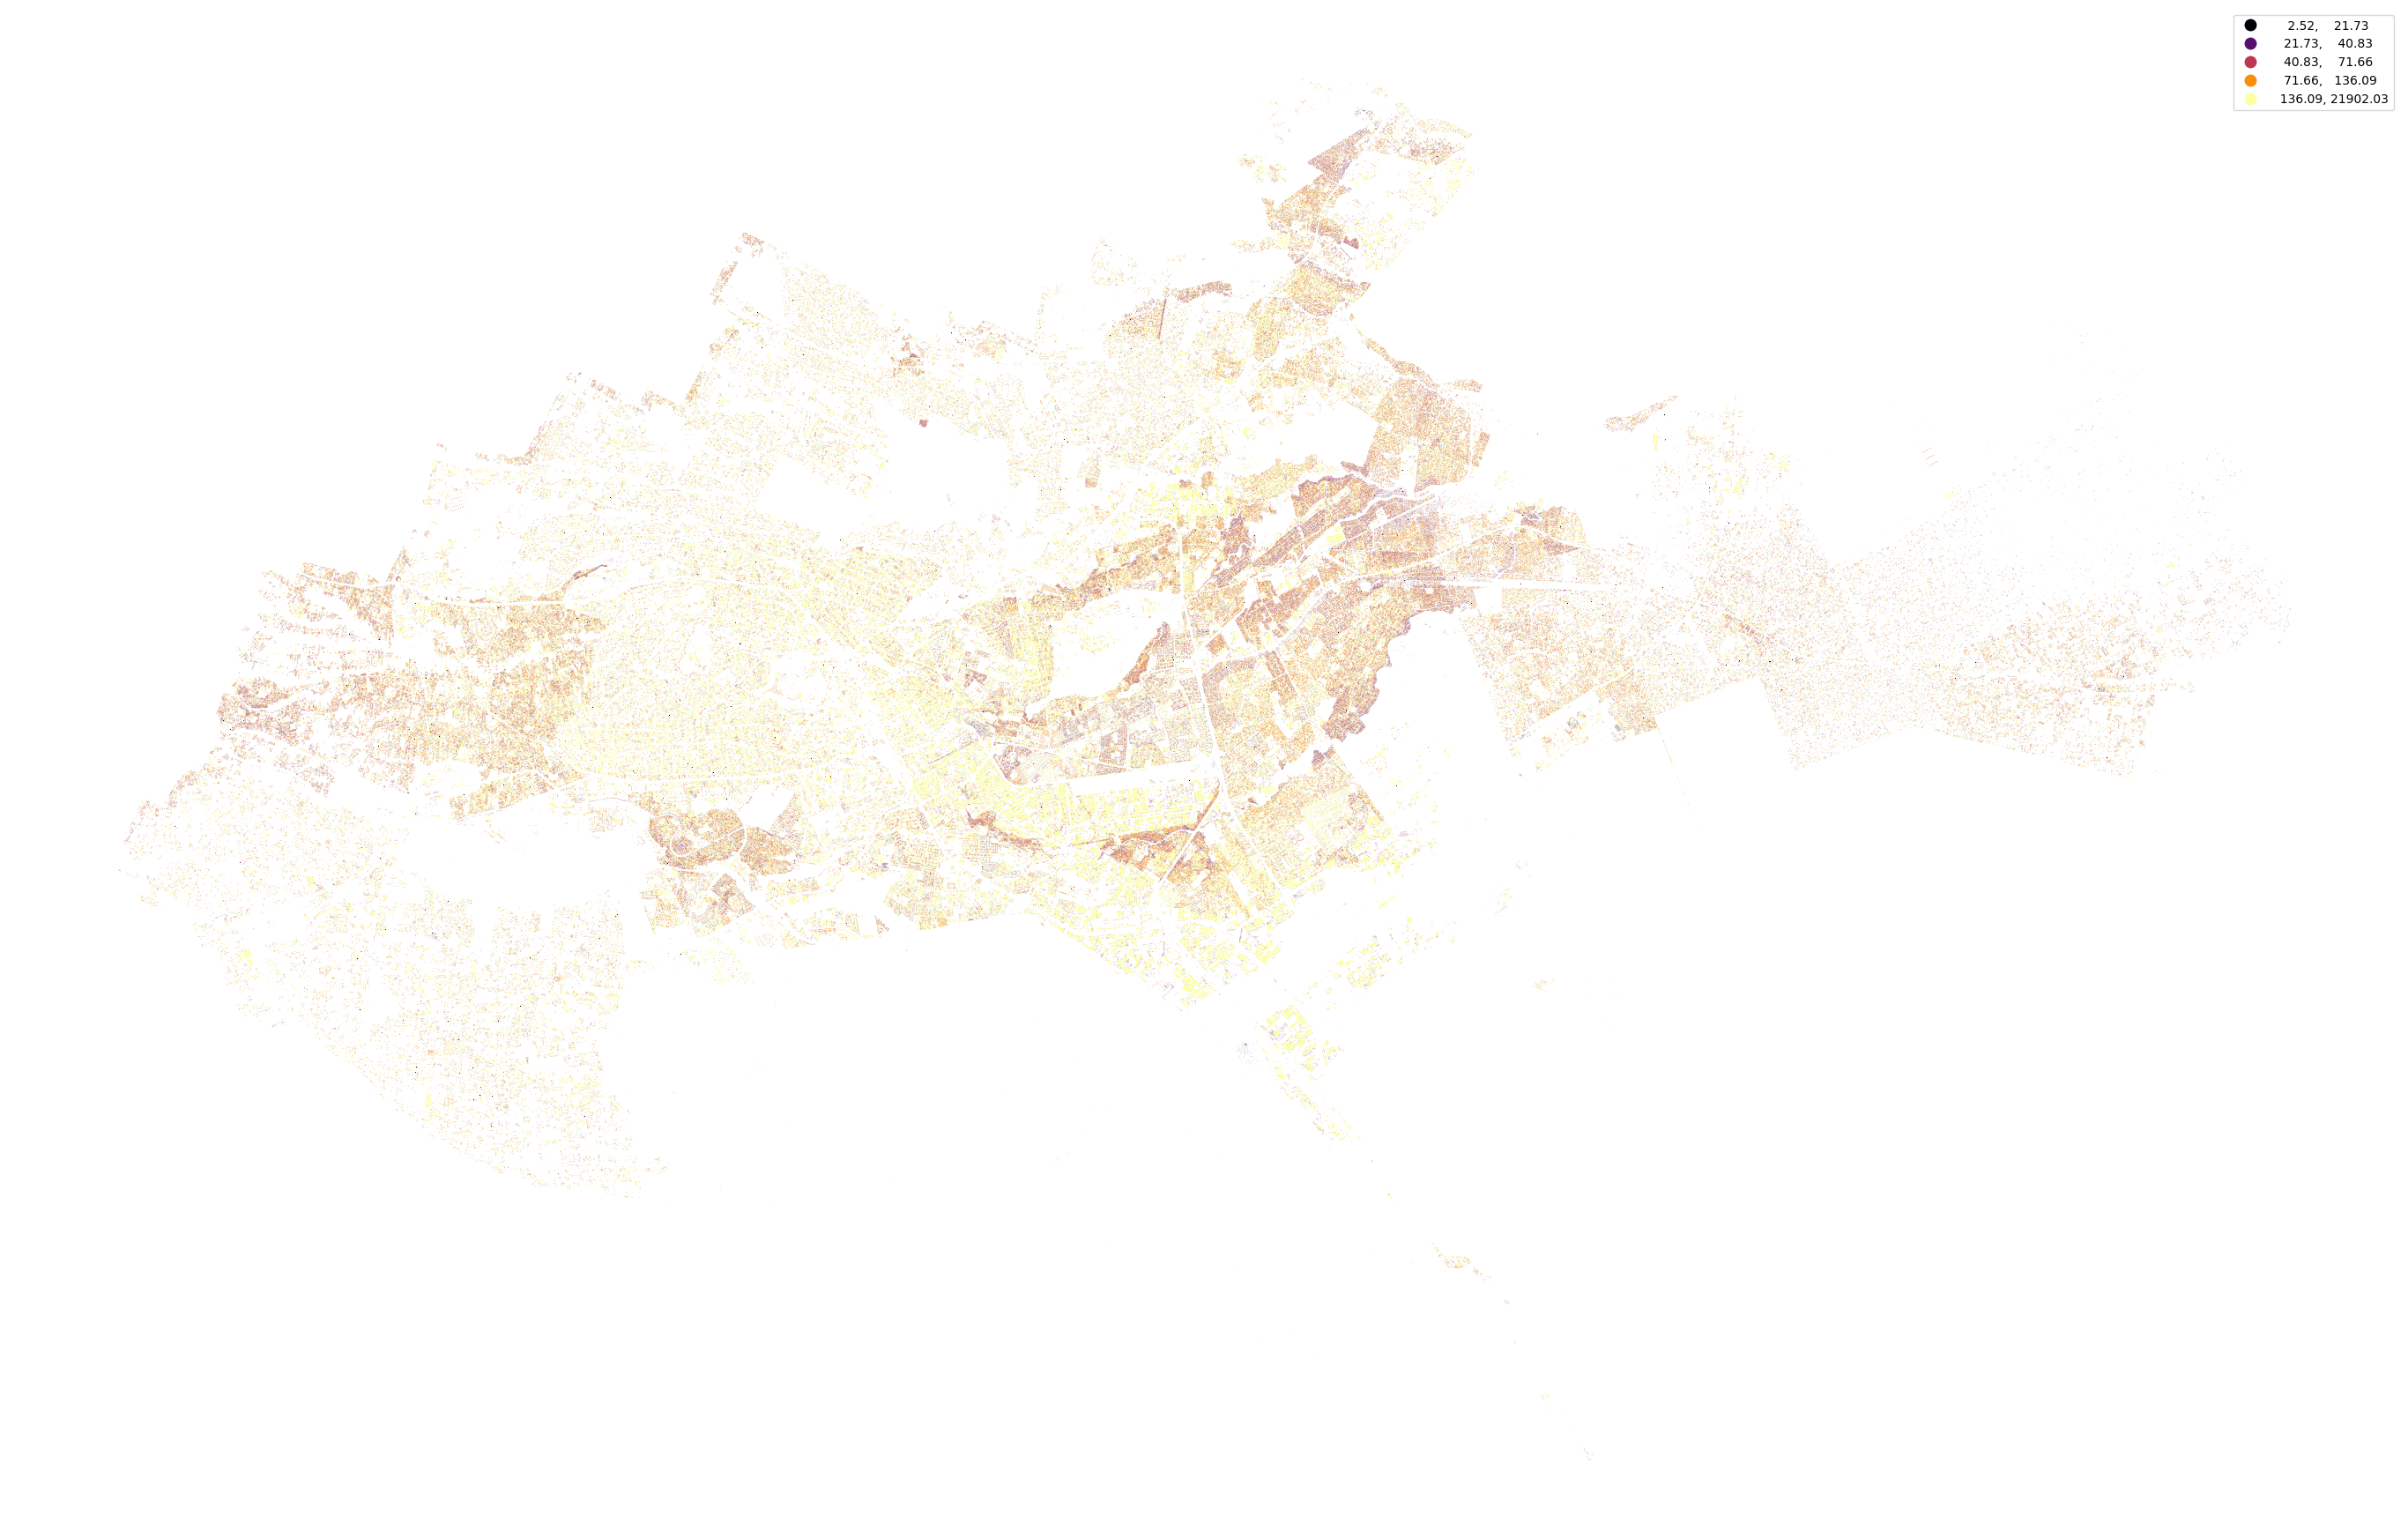

In [17]:
f, ax = plt.subplots(figsize=(35, 35))
Buildings.plot(ax=ax, column='area_in_me', legend=True, scheme='quantiles', k=5, cmap='inferno')
ax.set_axis_off()
plt.show()